In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This table represents TV Station Sales price:salesprice versus some explanatory variables
# including Market Sales: mktsales, Market Income: mktincome, Homes Per Stations:hmspersta, Network Hourly Rate: nethrlyrate
# National Spot Rate: natspotrate, If the station existed before or after 1952 1 if before 1/1/1952 0 if after
# Number of network ties:ties, and the percent of the population that's urban:perurban
# Data Source: https://users.stat.ufl.edu/~winner/data/tvsales.dat

tvstatsales = pd.read_csv('TVStatSales.csv')

In [3]:
tvstatsales

,callsign,salesprice,mktsales,mktincome,hmspersta,nethrlyrate,natspotrate,before52,ties,perurban
0,WNHC,3620,4406,6782,204,1100,160,1,1,71.6
1,WHTN,257,1389,2133,71,450,100,1,2,33.8
2,WHAM,900,1523,1588,103,900,165,0,1,64.8
3,WTVT,2246,1636,1493,113,500,120,1,0,70.0
4,WSVA,449,428,511,51,200,30,1,1,29.5
5,KOSA,145,474,672,15,150,50,1,0,66.9
6,WDAM,13,224,279,46,100,35,1,1,23.8
7,KOB,630,271,370,18,325,85,0,0,88.3
8,WJZ,1854,2692,3882,246,1450,300,0,2,68.5
9,KOVR,898,2272,3395,349,650,135,1,2,62.5


In [4]:
# Let's look at some basic statistics
tvstatsales.describe()

,salesprice,mktsales,mktincome,hmspersta,nethrlyrate,natspotrate,before52,ties,perurban
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1981.774194,1873.516129,2473.903226,206.129032,684.032258,143.774194,0.774194,0.903226,52.974194
std,2530.734712,2037.010585,2729.924045,288.620251,670.024153,139.220140,0.425024,0.830857,17.522461
min,13.000000,85.000000,136.000000,15.000000,60.000000,25.000000,0.000000,0.000000,23.100000
25%,297.000000,514.000000,715.000000,57.000000,237.500000,57.500000,1.000000,0.000000,36.850000
50%,900.000000,1389.000000,1886.000000,112.000000,550.000000,110.000000,1.000000,1.000000,59.500000
75%,3028.000000,2175.000000,2886.000000,233.500000,900.000000,182.500000,1.000000,2.000000,65.650000
max,12634.000000,8472.000000,13733.000000,1553.000000,3500.000000,750.000000,1.000000,2.000000,88.300000


[]

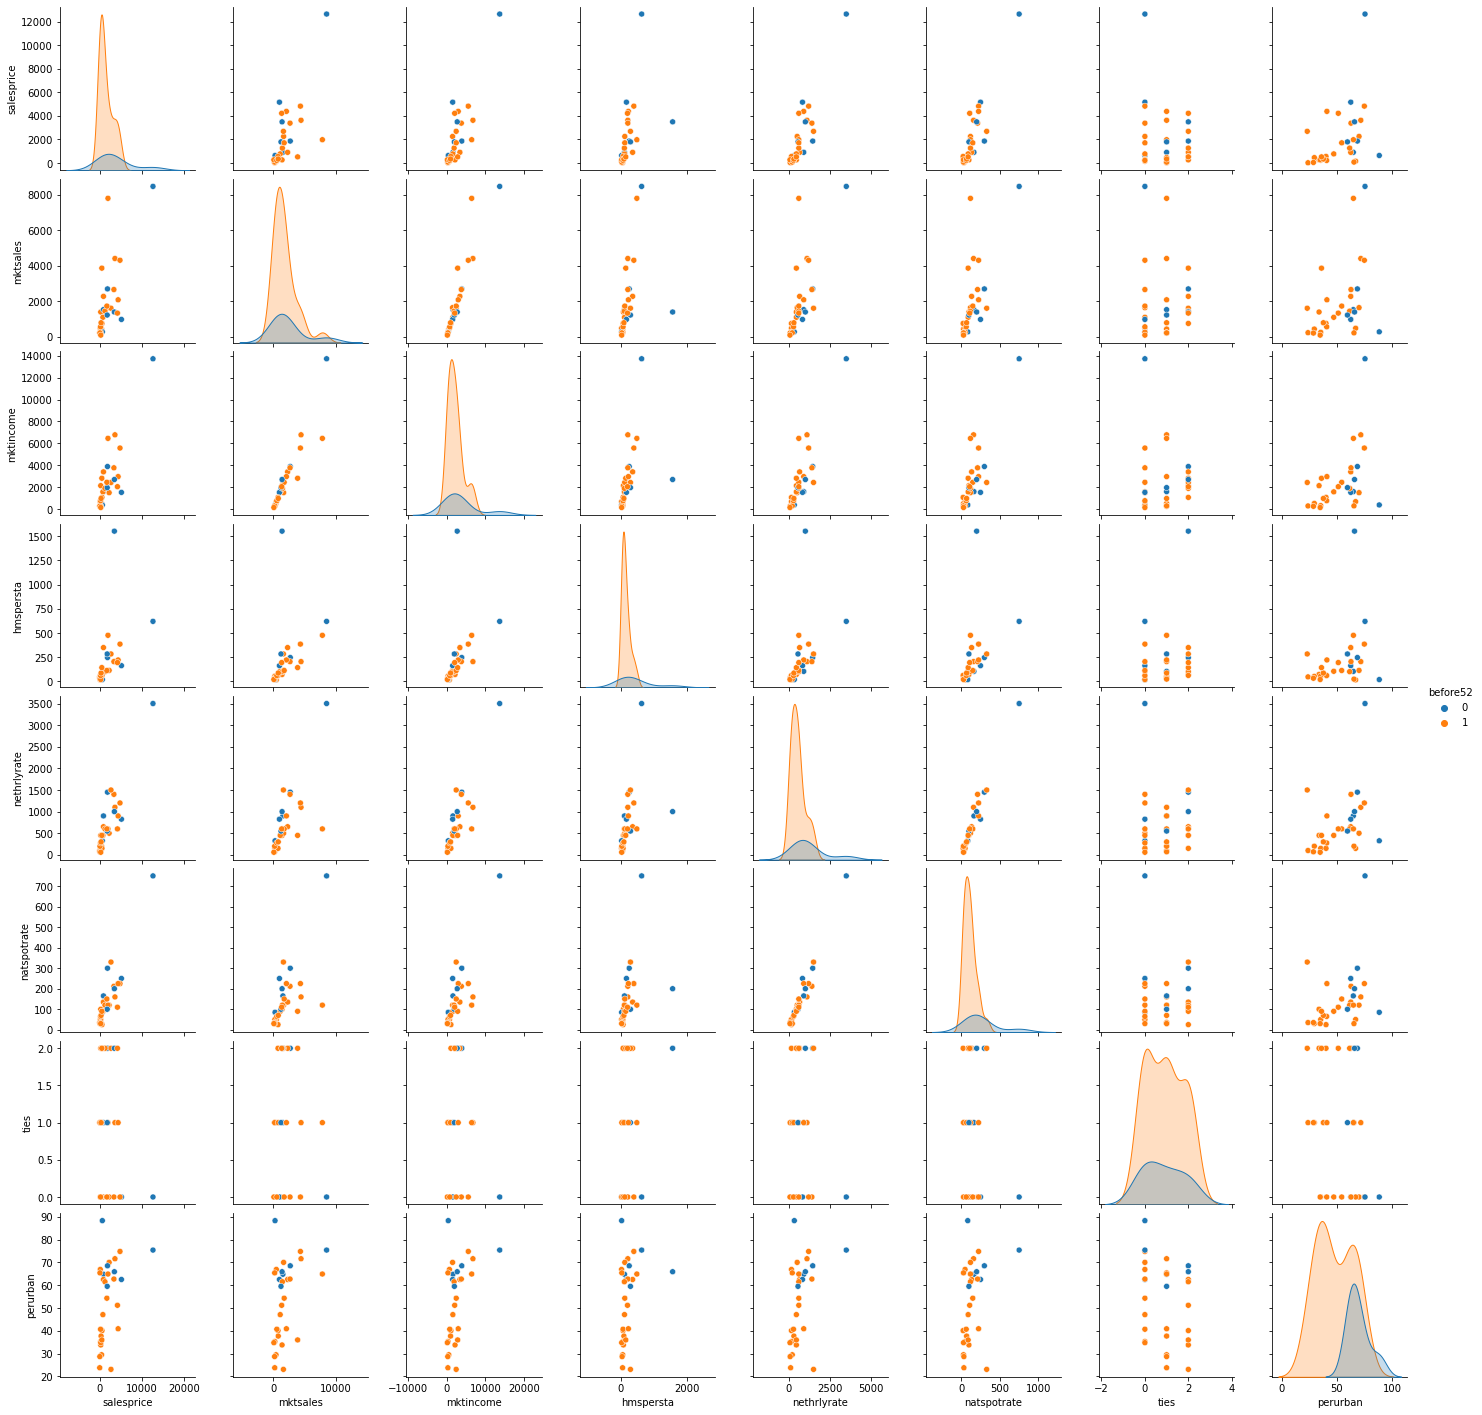

In [5]:
# Let's look at a pairs plot using sns
_=sns.pairplot(tvstatsales, hue = 'before52')
plt.plot()

In [6]:
# From this chart we can see some sharply linear relationships between sales price of a station and the 
# explanatory variables and there appear to be at least one significant outlier WCAU which, sold for
# significantly more money than any other stations
# We should look at these relationships without WCAU
# most of the variables are not particularly normal.  Before modeling some transformation would be needed

tv = tvstatsales[tvstatsales['callsign']!='WCAU']

In [7]:
tv.reset_index(drop = True)

,callsign,salesprice,mktsales,mktincome,hmspersta,nethrlyrate,natspotrate,before52,ties,perurban
0,WNHC,3620,4406,6782,204,1100,160,1,1,71.6
1,WHTN,257,1389,2133,71,450,100,1,2,33.8
2,WHAM,900,1523,1588,103,900,165,0,1,64.8
3,WTVT,2246,1636,1493,113,500,120,1,0,70.0
4,WSVA,449,428,511,51,200,30,1,1,29.5
5,KOSA,145,474,672,15,150,50,1,0,66.9
6,WDAM,13,224,279,46,100,35,1,1,23.8
7,KOB,630,271,370,18,325,85,0,0,88.3
8,WJZ,1854,2692,3882,246,1450,300,0,2,68.5
9,KOVR,898,2272,3395,349,650,135,1,2,62.5


In [8]:
x = list(tv.columns)[2:]
print(x)

['mktsales', 'mktincome', 'hmspersta', 'nethrlyrate', 'natspotrate', 'before52', 'ties', 'perurban']


In [9]:
len(tv['callsign'])

30

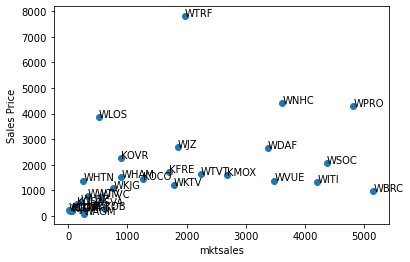

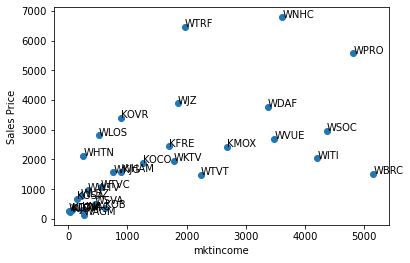

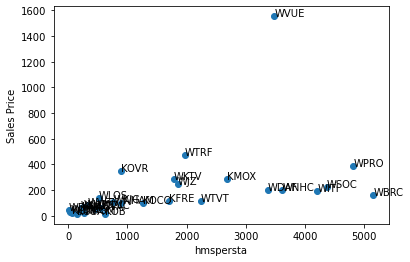

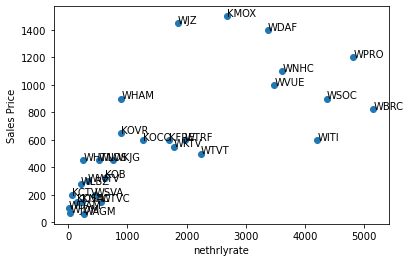

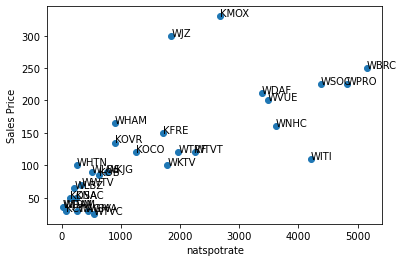

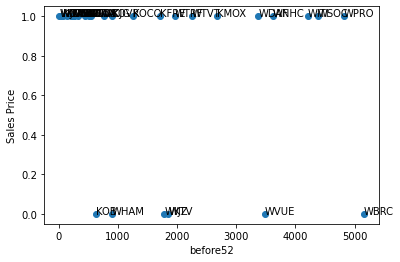

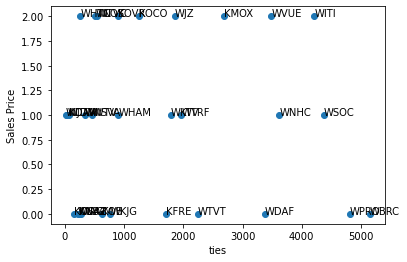

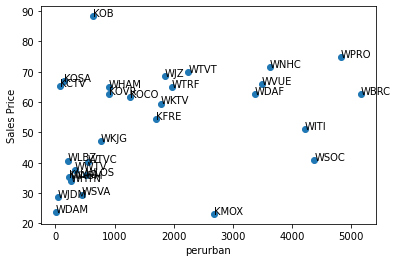

In [10]:
for x_i in x:
    plt.scatter(tv['salesprice'], tv[x_i])
    plt.xlabel(x_i)
    plt.ylabel('Sales Price')
    for i in range(len(tv['callsign'])):
        plt.annotate(tv['callsign'].iloc[i], (tv['salesprice'].iloc[i], tv[x_i].iloc[i]) )
    plt.show()


<h4 style="color:Blue;">From these plots we can see some relationships between sales price and the various explanatory variables
    <ol>
        <li>Market sales clearly influences sales price, the higher the market sales, the higher the station selling price</li>
        <li>Similarly market income is related, however it would have to be transformed to reduce the increasing variance</li>
        <li>Rates, both national spot and retail both are positively related</li>
        <li>The remaining variables similaryly have positive relationships</li>
    </ol>
    <p>Next we'll look at the correlation heat map</p>
</h4>

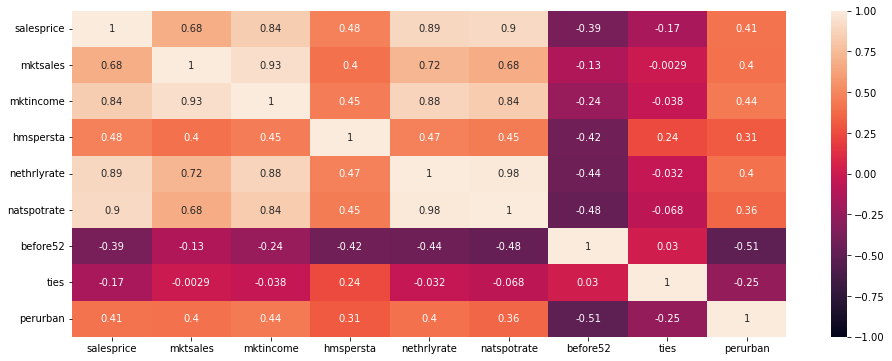

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(tvstatsales.corr(), vmin=-1, vmax=1, annot=True)

In [22]:
cols = list(tv.columns)
print(cols)
cols = cols[1:]

['callsign', 'salesprice', 'mktsales', 'mktincome', 'hmspersta', 'nethrlyrate', 'natspotrate', 'before52', 'ties', 'perurban']


<h4 style="color:Blue;">From this heatmap we can see strong negative correlation with before52 and ties.  Rates are strongly correlated as are sales.
</h4>

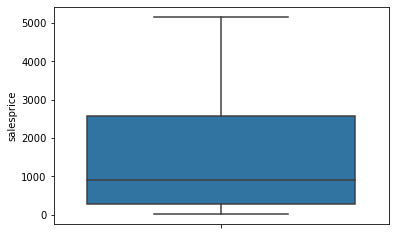

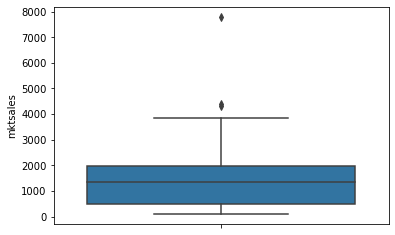

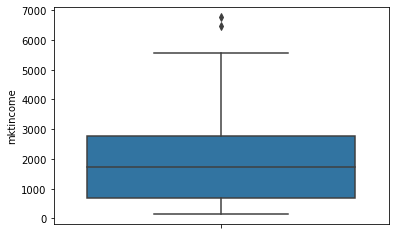

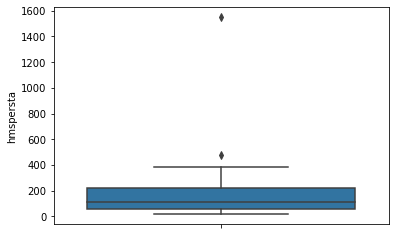

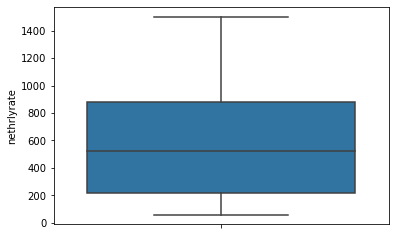

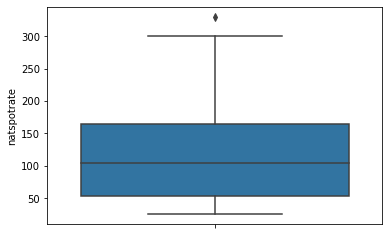

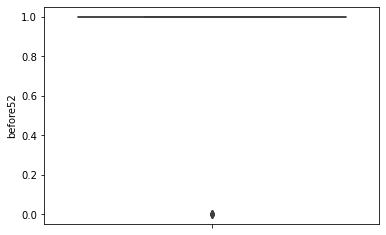

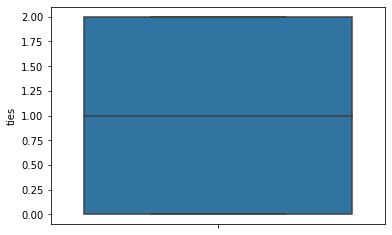

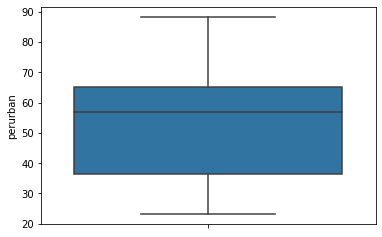

In [23]:
for c in cols:
    _ = sns.boxplot(y=c, data=tv)
    plt.show()

<h3>Some outliers are still evident
Final thoughts, this data table has excellent variables to predict station sales prices.  However, to fully implement it would require some transformations to deal with increasing variances and some non-normality if normal regression were to be used.
</h3>